In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
sns.set()

<div style="background-color:orange; padding:30px; text-align: center;">
    <h1> Bright spots </h1>
    <h2> (most likely mineral particles)
<div>

## 1. brights spots - sphericity

In [159]:
bright_spots = pd.read_excel('C:/Users/hamro/Desktop/finished_projects/venus_project/correct_data/BrightSpots_STD statistika_22022022.xlsx')

In [160]:
bright_spots.head()

,Volume3d (µm^3),BaryCenterX (µm),BaryCenterY (µm),BaryCenterZ (µm),Anisotropy,Elongation,Flatness,EigenVal1,EigenVal2,EigenVal3,...,BinMom2y (µm^2),BinMom2z (µm^2),BinMomxy (µm^2),BinMomxz (µm^2),BinMomyz (µm^2),VoxelFaceArea,BorderVoxelCount,GreyMass (µm^3),index,Materials
0,434555.6,26860.7,31310.7,-39614.1,0.817912,6.694580e-01,0.271993,0.000871,5.834160e-04,1.586850e-04,...,268.930,717.144,-8.964320e+01,179.28600,179.286,0.045897,0,434555.6,1,Quartz_SuperHight
1,434555.6,27689.2,29109.4,-39164.4,0.577046,9.017300e-01,0.469047,0.000607,5.476590e-04,2.568780e-04,...,358.573,515.447,-1.120540e+02,22.41080,112.054,0.043029,0,434555.6,2,NaN
2,54319.4,26434.7,27911.7,-36773.7,-1.000000,-1.000000e+00,-1.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000,0.000,0.000000e+00,0.00000,0.000,0.008606,0,54319.4,3,NaN
3,162958.3,28858.5,29010.0,-36508.6,1.000000,7.926360e-11,1.000000,0.000956,7.579120e-14,7.579120e-14,...,0.000,956.192,7.579120e-08,0.00000,0.000,0.020080,0,162958.3,4,NaN
4,1140710.0,25834.1,27071.3,-36001.8,0.823143,7.974890e-01,0.221767,0.001708,1.361990e-03,3.020450e-04,...,665.922,1567.280,-4.928220e+02,-7.65963,-300.595,0.088926,0,1140710.0,5,NaN


In [161]:
bright = bright_spots.copy() 

In [162]:
bright.drop(['EigenVal1', 'EigenVal2', 'EigenVal3', 'EigenVec1X', 'EigenVec1Y',
       'EigenVec1Z', 'EigenVec2X', 'EigenVec2Y', 'EigenVec2Z', 'EigenVec3X',
       'EigenVec3Y', 'EigenVec3Z', 'ExtentMin1 (µm) ', 'ExtentMin2 (µm) ',
       'ExtentMin3 (µm) ', 'ExtentMax1 (µm) ', 'ExtentMax2 (µm) ',
       'ExtentMax3 (µm) ', 'BinMom2x (µm^2) ', 'BinMom2y (µm^2) ',
       'BinMom2z (µm^2) ', 'BinMomxy (µm^2) ', 'BinMomxz (µm^2) ',
       'BinMomyz (µm^2) ','BorderVoxelCount', 'Materials', 'index', 'GreyMass (µm^3) '], axis=1, inplace=True)

In [163]:
bright.drop_duplicates(inplace=True)

### The total number of all bright spots is 1115 

In [164]:
bright

,Volume3d (µm^3),BaryCenterX (µm),BaryCenterY (µm),BaryCenterZ (µm),Anisotropy,Elongation,Flatness,VoxelFaceArea
0,434555.6,26860.7,31310.70,-39614.1,0.817912,6.694580e-01,0.271993,0.045897
1,434555.6,27689.2,29109.40,-39164.4,0.577046,9.017300e-01,0.469047,0.043029
2,54319.4,26434.7,27911.70,-36773.7,-1.000000,-1.000000e+00,-1.000000,0.008606
3,162958.3,28858.5,29010.00,-36508.6,1.000000,7.926360e-11,1.000000,0.020080
4,1140710.0,25834.1,27071.30,-36001.8,0.823143,7.974890e-01,0.221767,0.088926
...,...,...,...,...,...,...,...,...
1110,271597.2,27987.4,24192.70,69593.6,0.717609,3.552320e-01,0.794946,0.031554
1111,108638.9,26567.2,26396.80,69570.9,1.000000,0.000000e+00,-1.000000,0.014343
1112,54319.4,25828.7,24124.50,70138.9,-1.000000,-1.000000e+00,-1.000000,0.008606
1113,162958.3,21902.7,8824.19,70606.0,0.999643,2.002310e-01,0.001784,0.020080


In [165]:
bright.columns

Index(['Volume3d (µm^3) ', 'BaryCenterX (µm) ', 'BaryCenterY (µm) ',
       'BaryCenterZ (µm) ', 'Anisotropy', 'Elongation', 'Flatness',
       'VoxelFaceArea'],
      dtype='object')

### spatial distribution of bright spots (volume is exaggarated for purposes of visualization)

In [166]:
import plotly.express as px

fig= px.scatter_3d(bright, x='BaryCenterX (µm) ', y='BaryCenterY (µm) ', z='BaryCenterZ (µm) ',
              size='Volume3d (µm^3) ')

fig.show()

In [167]:
bright.sort_values(by='Volume3d (µm^3) ', inplace=True, ascending=False)

In [168]:
bright.head()


,Volume3d (µm^3),BaryCenterX (µm),BaryCenterY (µm),BaryCenterZ (µm),Anisotropy,Elongation,Flatness,VoxelFaceArea
667,7224490.0,22050.3,25717.7,43257.80,0.974847,0.026112,0.963270,0.473316
204,5431940.0,31646.6,11820.6,9863.01,0.894271,0.360805,0.293036,0.304069
932,4182600.0,27747.9,29361.7,57177.90,0.982126,0.782647,0.022838,0.309806
69,3204850.0,22236.0,28335.4,-4544.63,0.563716,0.898917,0.485344,0.172115
478,2824610.0,24029.8,26138.3,29441.10,0.984450,0.044017,0.353264,0.200801


In [169]:
bright.isnull().sum()

Volume3d (µm^3)      0
BaryCenterX (µm)     0
BaryCenterY (µm)     0
BaryCenterZ (µm)     0
Anisotropy           0
Elongation           0
Flatness             0
VoxelFaceArea        0
dtype: int64

In [170]:
bright.isnull().sum().sum()

0

In [171]:
bright.dtypes

Volume3d (µm^3)      float64
BaryCenterX (µm)     float64
BaryCenterY (µm)     float64
BaryCenterZ (µm)     float64
Anisotropy           float64
Elongation           float64
Flatness             float64
VoxelFaceArea        float64
dtype: object

#### changing volume units

In [172]:
bright.head(2)

,Volume3d (µm^3),BaryCenterX (µm),BaryCenterY (µm),BaryCenterZ (µm),Anisotropy,Elongation,Flatness,VoxelFaceArea
667,7224490.0,22050.3,25717.7,43257.80,0.974847,0.026112,0.963270,0.473316
204,5431940.0,31646.6,11820.6,9863.01,0.894271,0.360805,0.293036,0.304069


In [173]:
conversion_cubed = 0.000000001
conversion = 0.001
bright['Volume3d (µm^3) '] = bright['Volume3d (µm^3) '].apply(lambda x: x*conversion_cubed)
bright['BaryCenterX (µm) '] = bright['Volume3d (µm^3) '].apply(lambda x: x*conversion)
bright['BaryCenterY (µm) '] = bright['Volume3d (µm^3) '].apply(lambda x: x*conversion)
bright['BaryCenterZ (µm) '] = bright['Volume3d (µm^3) '].apply(lambda x: x*conversion)

In [174]:
bright.rename(columns={'Volume3d (µm^3) ': 'Volume3d (mm^3) ', 'BaryCenterX (µm) ': 'BaryCenterX (mm) ', 'BaryCenterY (µm) ':'BaryCenterY (mm) ', 'BaryCenterZ (µm) ':'BaryCenterZ (mm) '}, inplace=True)

In [175]:
bright

,Volume3d (mm^3),BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,VoxelFaceArea
667,0.007224,7.224490e-06,7.224490e-06,7.224490e-06,0.974847,0.026112,0.963270,0.473316
204,0.005432,5.431940e-06,5.431940e-06,5.431940e-06,0.894271,0.360805,0.293036,0.304069
932,0.004183,4.182600e-06,4.182600e-06,4.182600e-06,0.982126,0.782647,0.022838,0.309806
69,0.003205,3.204850e-06,3.204850e-06,3.204850e-06,0.563716,0.898917,0.485344,0.172115
478,0.002825,2.824610e-06,2.824610e-06,2.824610e-06,0.984450,0.044017,0.353264,0.200801
...,...,...,...,...,...,...,...,...
678,0.000054,5.431940e-08,5.431940e-08,5.431940e-08,-1.000000,-1.000000,-1.000000,0.008606
679,0.000054,5.431940e-08,5.431940e-08,5.431940e-08,-1.000000,-1.000000,-1.000000,0.008606
293,0.000054,5.431940e-08,5.431940e-08,5.431940e-08,-1.000000,-1.000000,-1.000000,0.008606
291,0.000054,5.431940e-08,5.431940e-08,5.431940e-08,-1.000000,-1.000000,-1.000000,0.008606


### sphericity

In [176]:
import math
def sphericity(volume, surface_area):
    return ((math.pi**(1./3.))*((6*volume)**(2./3.)))/surface_area

In [177]:
bright['sphericity'] = bright.apply(lambda x: sphericity(x['Volume3d (mm^3) '], x['VoxelFaceArea']), axis=1)

### basic descriptive statistics for sphericity of bright spots

In [178]:
pd.DataFrame(bright['sphericity'].describe())

,sphericity
count,1115.000000
mean,0.763866
std,0.065732
min,0.381831
25%,0.761620
50%,0.805995
75%,0.805995
max,0.805995


In [179]:
bright.head()

,Volume3d (mm^3),BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,VoxelFaceArea,sphericity
667,0.007224,0.000007,0.000007,0.000007,0.974847,0.026112,0.963270,0.473316,0.381831
204,0.005432,0.000005,0.000005,0.000005,0.894271,0.360805,0.293036,0.304069,0.491453
932,0.004183,0.000004,0.000004,0.000004,0.982126,0.782647,0.022838,0.309806,0.405221
69,0.003205,0.000003,0.000003,0.000003,0.563716,0.898917,0.485344,0.172115,0.610760
478,0.002825,0.000003,0.000003,0.000003,0.984450,0.044017,0.353264,0.200801,0.481235


### grouping particles based on the same volume

In [180]:
group_tab = bright.groupby('Volume3d (mm^3) ').mean('sphericity')
group_tab

,BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,VoxelFaceArea,sphericity
Volume3d (mm^3),,,,,,,,
0.000054,5.431940e-08,5.431940e-08,5.431940e-08,-1.000000,-1.000000,-1.000000,0.008606,0.805995
0.000109,1.086389e-07,1.086389e-07,1.086389e-07,1.000000,0.001498,-0.948113,0.014492,0.761025
0.000163,1.629583e-07,1.629583e-07,1.629583e-07,0.971610,0.331153,0.095220,0.020367,0.709534
0.000217,2.172778e-07,2.172778e-07,2.172778e-07,0.929173,0.743835,0.112490,0.024407,0.719946
0.000272,2.715972e-07,2.715972e-07,2.715972e-07,0.826558,0.463312,0.348884,0.029961,0.680583
0.000326,3.259167e-07,3.259167e-07,3.259167e-07,0.777028,0.527402,0.409836,0.033849,0.679537
0.000380,3.802361e-07,3.802361e-07,3.802361e-07,0.839380,0.450544,0.378674,0.036973,0.686930
0.000435,4.345556e-07,4.345556e-07,4.345556e-07,0.678199,0.564969,0.564543,0.040160,0.699900
0.000489,4.888750e-07,4.888750e-07,4.888750e-07,0.799222,0.569045,0.338770,0.048766,0.620827


In [181]:
sphericity_for_groups = group_tab['sphericity'].values
p= bright['Volume3d (mm^3) '].value_counts()
freq_table = pd.DataFrame({"Volume3d (mm^3)": p.index, "frequency": p.values}).set_index("Volume3d (mm^3)")
freq_table['frequency [%]'] = freq_table.apply(lambda x: round((x/1115)*100,2)) 
freq_table['sphericity mean'] = sphericity_for_groups
freq_table

,frequency,frequency [%],sphericity mean
Volume3d (mm^3),,,
0.000054,599,53.72,0.805995
0.000109,212,19.01,0.761025
0.000163,100,8.97,0.709534
0.000217,59,5.29,0.719946
0.000272,36,3.23,0.680583
0.000326,30,2.69,0.679537
0.000543,15,1.35,0.686930
0.000435,14,1.26,0.699900
0.000380,9,0.81,0.620827


In [182]:
group_tab['count'] = freq_table['frequency']

In [183]:
group_tab.head()

,BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,VoxelFaceArea,sphericity,count
Volume3d (mm^3),,,,,,,,,
0.000054,5.431940e-08,5.431940e-08,5.431940e-08,-1.000000,-1.000000,-1.000000,0.008606,0.805995,599
0.000109,1.086389e-07,1.086389e-07,1.086389e-07,1.000000,0.001498,-0.948113,0.014492,0.761025,212
0.000163,1.629583e-07,1.629583e-07,1.629583e-07,0.971610,0.331153,0.095220,0.020367,0.709534,100
0.000217,2.172778e-07,2.172778e-07,2.172778e-07,0.929173,0.743835,0.112490,0.024407,0.719946,59
0.000272,2.715972e-07,2.715972e-07,2.715972e-07,0.826558,0.463312,0.348884,0.029961,0.680583,36


### you can see below that the most common group of bright spots, containing in total 599 bright spots is erroneous (phisical features are wrong - out of possible scale)
#### we are going to take them out of this dataset

In [195]:
val_delete = group_tab.index[0]

In [196]:
bright = bright[bright['Volume3d (mm^3) '] != val_delete]

In [197]:
bright.count()

Volume3d (mm^3)      516
BaryCenterX (mm)     516
BaryCenterY (mm)     516
BaryCenterZ (mm)     516
Anisotropy           516
Elongation           516
Flatness             516
VoxelFaceArea        516
sphericity           516
dtype: int64

### there are still some erroneous values with flatness == -1

In [198]:
bright.describe()

,Volume3d (mm^3),BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,VoxelFaceArea,sphericity
count,516.000000,5.160000e+02,5.160000e+02,5.160000e+02,516.000000,516.000000,5.160000e+02,516.000000,516.000000
mean,0.000294,2.939145e-07,2.939145e-07,2.939145e-07,0.928458,0.290437,-2.454785e-01,0.029014,0.714959
std,0.000538,5.375801e-07,5.375801e-07,5.375801e-07,0.135747,0.314709,6.485768e-01,0.035581,0.069894
min,0.000109,1.086389e-07,1.086389e-07,1.086389e-07,0.000004,0.000000,-1.000000e+00,0.014343,0.381831
25%,0.000109,1.086389e-07,1.086389e-07,1.086389e-07,0.910870,0.000000,-1.000000e+00,0.014343,0.676995
50%,0.000163,1.629583e-07,1.629583e-07,1.629583e-07,1.000000,0.235498,1.883002e-17,0.020080,0.718515
75%,0.000272,2.715972e-07,2.715972e-07,2.715972e-07,1.000000,0.500002,2.595165e-01,0.028686,0.767663
max,0.007224,7.224490e-06,7.224490e-06,7.224490e-06,1.000000,0.999999,1.000000e+00,0.473316,0.805995


In [199]:
bright = bright[bright['Flatness'] != -1]

In [201]:
bright.describe()

,Volume3d (mm^3),BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,VoxelFaceArea,sphericity
count,312.000000,3.120000e+02,3.120000e+02,3.120000e+02,312.000000,3.120000e+02,312.000000,312.000000,312.000000
mean,0.000415,4.145340e-07,4.145340e-07,4.145340e-07,0.881680,4.803374e-01,0.247862,0.038551,0.680971
std,0.000665,6.645371e-07,6.645371e-07,6.645371e-07,0.157994,2.692553e-01,0.281028,0.043189,0.071661
min,0.000109,1.086389e-07,1.086389e-07,1.086389e-07,0.000004,3.926670e-22,0.000000,0.017212,0.381831
25%,0.000163,1.629583e-07,1.629583e-07,1.629583e-07,0.807020,2.921973e-01,0.006282,0.020080,0.644797
50%,0.000217,2.172778e-07,2.172778e-07,2.172778e-07,0.965198,4.282535e-01,0.112826,0.025817,0.707024
75%,0.000380,3.802361e-07,3.802361e-07,3.802361e-07,0.998090,6.818180e-01,0.436971,0.037291,0.718515
max,0.007224,7.224490e-06,7.224490e-06,7.224490e-06,1.000000,9.999990e-01,1.000000,0.473316,0.805995


In [205]:
bright.count()

Volume3d (mm^3)      312
BaryCenterX (mm)     312
BaryCenterY (mm)     312
BaryCenterZ (mm)     312
Anisotropy           312
Elongation           312
Flatness             312
VoxelFaceArea        312
sphericity           312
dtype: int64

### after deleting all obvious error values - we have 312 bright spots

### mean and std of sphericity

In [208]:
mean_sphericity = bright['sphericity'].mean()
std_sphericity = bright['sphericity'].std()

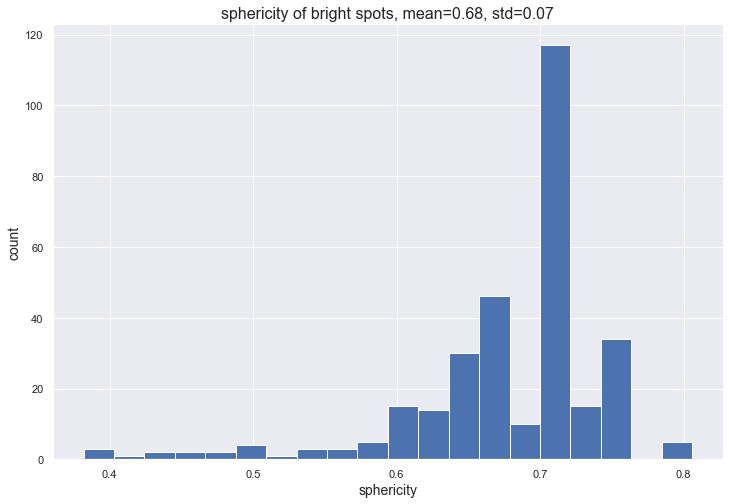

In [209]:
fig = plt.figure(figsize=(12,8))
plt.hist(bright['sphericity'], bins=20)
plt.title(f"sphericity of bright spots, mean={round(mean_sphericity,2)}, std={round(std_sphericity,2)}", {'size':16})
plt.xlabel("sphericity", {'size':14})
plt.ylabel("count", {'size':14})
plt.show()

### (sphericity of bright spots) KDE: bandwith=0.1, kernel=gaussian. 
### Bandwith was selected using Siverman's rule

In [210]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KernelDensity
import numpy as np
from KDEpy import FFTKDE

bandwidths = 10 ** np.linspace(-1, 1, 20)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(np.array(bright['sphericity']).reshape(-1,1));

In [211]:
grid.best_params_

{'bandwidth': 0.1}

C:\Users\hamro\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.



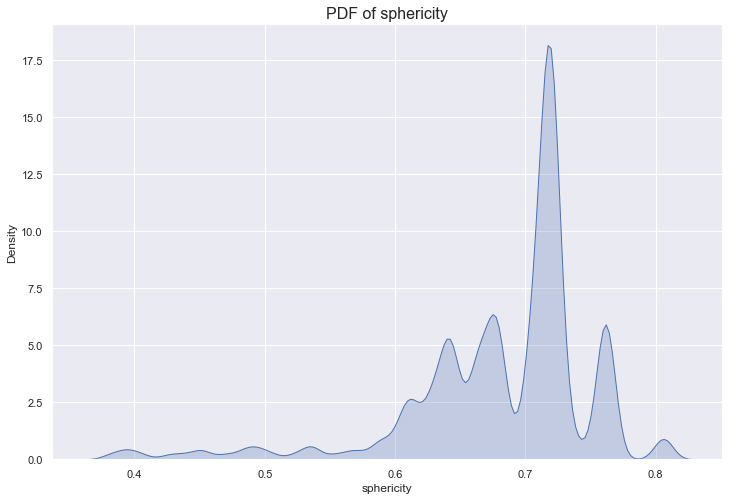

In [212]:
fig = plt.figure(figsize=(12,8))
plt.title("PDF of sphericity", {'size':16})
sns.kdeplot(bright['sphericity'], bw=0.1, shade=True)
plt.show()

C:\Users\hamro\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.



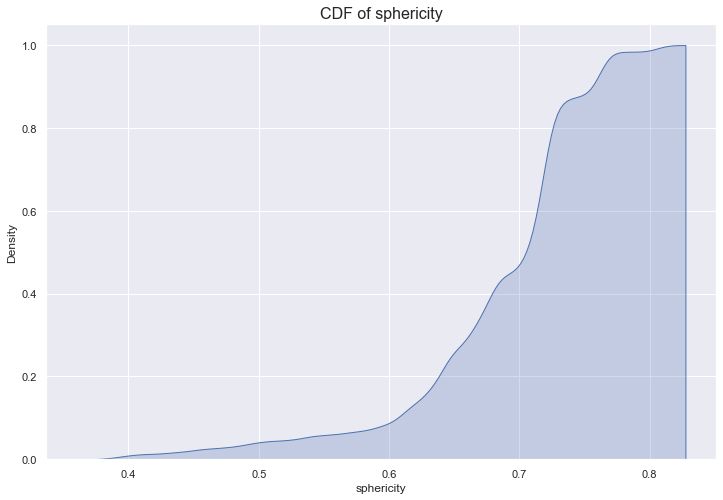

In [213]:
fig = plt.figure(figsize=(12,8))
plt.title("CDF of sphericity", {'size':16})
sns.kdeplot(bright['sphericity'], bw=0.1, shade=True, cumulative=True)
plt.show()

In [214]:
bright.head()

,Volume3d (mm^3),BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,VoxelFaceArea,sphericity
667,0.007224,0.000007,0.000007,0.000007,0.974847,0.026112,0.963270,0.473316,0.381831
204,0.005432,0.000005,0.000005,0.000005,0.894271,0.360805,0.293036,0.304069,0.491453
932,0.004183,0.000004,0.000004,0.000004,0.982126,0.782647,0.022838,0.309806,0.405221
69,0.003205,0.000003,0.000003,0.000003,0.563716,0.898917,0.485344,0.172115,0.610760
478,0.002825,0.000003,0.000003,0.000003,0.984450,0.044017,0.353264,0.200801,0.481235


In [153]:
corr = np.corrcoef(x=bright.index,y=bright['sphericity'])[0][1]

### sphericity vs volume correlation

In [215]:
corr = np.corrcoef(x=bright.index,y=bright['sphericity'])[0][1]

C:\Users\hamro\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



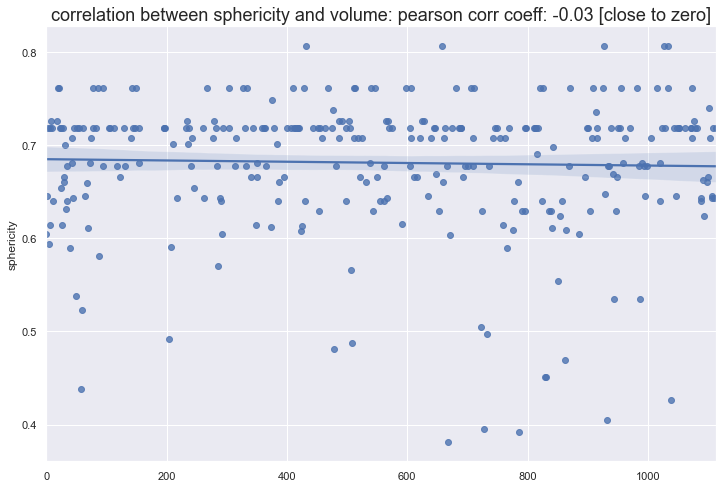

In [219]:
fig = plt.figure(figsize=(12,8))
sns.regplot(bright.index, bright['sphericity'])
plt.title(f"correlation between sphericity and volume: pearson corr coeff: {round(corr,2)} [close to zero]", {'size': 18})
plt.show()